# Introducción a la Estadística Bayesiana

Juan Sosa PhD

Email jcsosam@unal.edu.co

GitHub https://github.com/jstats1702 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import beta

# Ejemplo de motivación

Tomado de Hoff (2009, *A First Course in Bayesian Statistical Methods*, Cap. 1).

Se quiere estimar la **prevalencia de una enfermedad** $\theta$ (proporción de la población que padece la enfermedad).

El **espacio de parámetros** es $\Theta = (0,1)$.

Se examinará una muestra aleatoria de $n=20$ individuos para observar el **número de personas infectadas en la muestra** $y$.

El **espacio de observaciones** es $\mathcal{Y} = \{0,\ldots,n\}$.


# Distribución muestral (*sampling distribution*)

**Distribución muestral $p(y\mid\theta)$**: Mecanismo aleatorio que caracteriza completamente cómo se genera $y$ dado un valor específico de $\theta$.


## Ejemplo (cont.)

**Antes** de realizar el proceso de observación, $y$ es una **variable aleatoria** tal que 
$$
y\mid\theta\sim\textsf{Binomial}(n,\theta)
\qquad\Longleftrightarrow\qquad
p(y\mid\theta) = \binom{n}{y}\theta^y(1-\theta)^{n-y}
$$
para con $y\in\mathcal{Y}=\{1,\ldots,n\}$ y $\theta\in\Theta=(0,1)$.


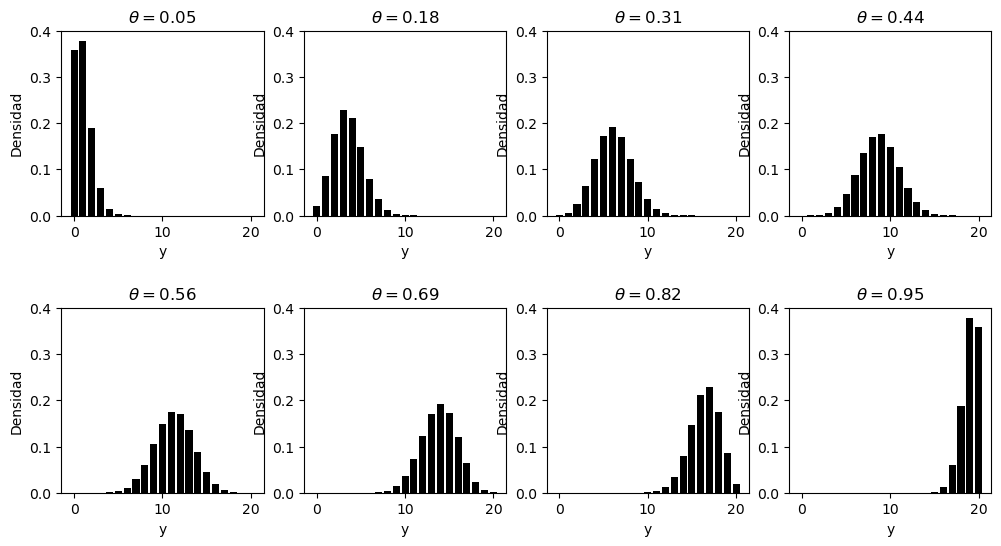

In [19]:
n = 20
m = 8
theta = np.linspace(0.05, 0.95, m)

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)
for i, ax in enumerate(axs.flatten()):
    y = binom.pmf(range(n + 1), n, theta[i])
    ax.bar(range(n + 1), y, color='black')
    ax.set(xlabel='y', ylabel='Densidad', title=r'$\theta = {}$'.format(round(theta[i], 2)))
    ax.set_ylim(0, 0.4)

plt.show()

# Distribución previa (*prior distribution*)

**Distribución previa $p(\theta)$**: Mecanismo aleatorio que caracteriza la información acerca de $\theta$ externa al conjunto de datos $y$.

Existen **infinitas distribuciones probabilísticas** que se pueden usar para representar la **información previa** acerca de $\theta$. 

Se acostumbra a usar una distribución con una **forma matemática conveniente**.


## Ejemplo (cont.)

Se representa la información previa acerca de $\theta$ por medio de la **distribuciones Beta**, de forma que
$$
\theta\sim\textsf{Beta}(a,b)
\qquad\Longleftrightarrow\qquad
p(\theta) = \frac{\Gamma(a+b)}{\Gamma(a)\,\Gamma(b)}\,\theta^{a-1}(1-\theta)^{b-1}
$$
donde $\theta\in\Theta=(0,1)$ y $a$ y $b$ son **cantidades fijas conocidas** que se conocen como **hiperparámetros**.

Usando $a=b=1$ se tiene que $p(\theta) = 1$ para todo $0<\theta<1$, i.e., no se favorece ningún valor de $\theta$ a priori. 


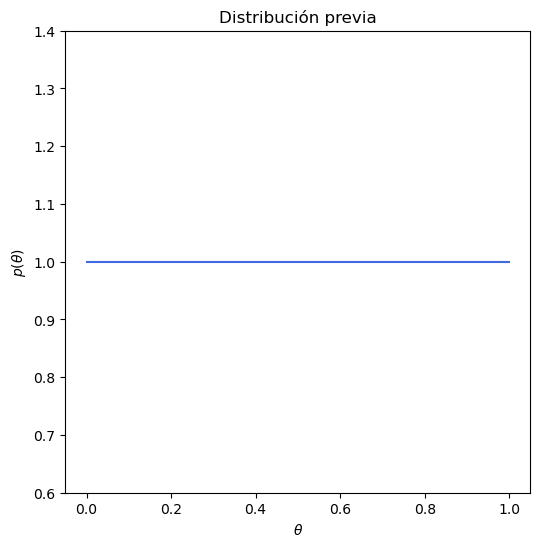

In [34]:
a = 1
b = 1

theta_values = np.linspace(0, 1, 1000)
prior_distribution = beta.pdf(theta_values, a, b)

plt.figure(figsize=(6, 6))
plt.plot(theta_values, prior_distribution, color='royalblue')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.title('Distribución previa')
plt.ylim(0.6, 1.4)
plt.show()

# Distribución posterior (*posterior distribution*)

**Distribución posterior $p(\theta\mid y)$**: Mecanismo aleatorio que caracteriza la información actualizada acerca de $\theta$ después de observar $y$.

**Después** de realizar el proceso de observación, $y$ es una **cantidad fija**.

La **inferencia estadística** consiste en **aprender** (disminuir la incertidumbre) acerca de los **parámetros** (características) $\boldsymbol{\theta}=(\theta_1,\ldots,\theta_k)$ de una **población** (proceso generativo) a partir de una **fuente de información** (conjunto de datos) $\boldsymbol{y}=(y_1,\ldots,y_n)$ de la misma. 

El **Teorema de Bayes** es el **método racional óptimo** que garantiza la **coherencia y consistencia lógica** para **actualizar el estado de información** acerca de $\boldsymbol{\theta}$ de acuerdo con la información contenida en $\boldsymbol{y}$:
$$
p(\boldsymbol{\theta}\mid \boldsymbol{y}) = \frac{p(\boldsymbol{\theta},\boldsymbol{y})}{p(\boldsymbol{y})} = \frac{p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta})}{\int_\Theta p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta})\,\text{d}\boldsymbol{\theta}}\propto p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta}).
$$

El teorema de Bayes establece **cómo debe cambiar la información** acerca de $\boldsymbol{\theta}$ bajo la evidencia empírica que proporciona $\boldsymbol{y}$.


## Ejemplo (cont.)

Considere el **modelo** dado por
$$
\begin{align*}
y\mid\theta &\sim \textsf{Binomial}(n,\theta)\\
\theta      &\sim \textsf{Beta}(a,b)
\end{align*}
$$
cuyo **grafo acíclico dirigido** (DAG, *Directed Acyclic Graph*) es

![Image](01_DAG_introduccion.jpg)

con $y\in\mathcal{Y}=\{1,\ldots,n\}$, $\theta\in\Theta=(0,1)$ y $a$ y $b$ son los hiperparámetros del modelo. 

Bajo este modelo la **distribución posterior** de $\theta$ es
$$
\theta\mid y\sim\textsf{Beta}(a+y,b+n-y)
\qquad\Longleftrightarrow\qquad
p(\theta\mid y) = \frac{\Gamma(a+b+n)}{\Gamma(a+y)\,\Gamma(b+n-y)}\,\theta^{a+y-1}(1-\theta)^{b+n-y-1}.
$$

Se observa que ninguno de los individuos de la muestra está infectado, i.e., $y=1$. Entonces, la distribución posterior de $\theta$ es $\theta\mid y \sim \textsf{Beta}(2,20)$.

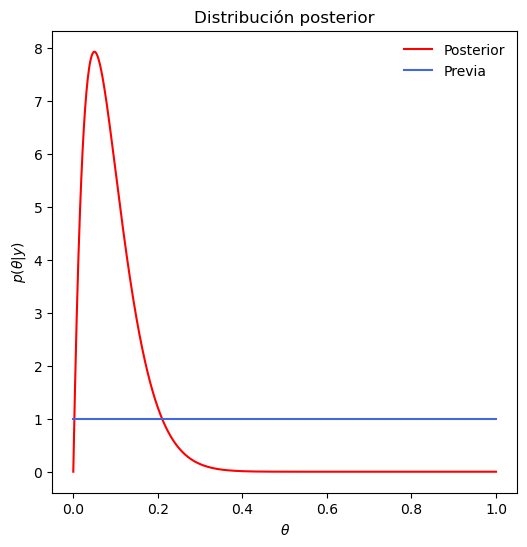

In [5]:
a = 1
b = 1
n = 20
y = 1

theta_values = np.linspace(0, 1, 1000)
prior_distribution = beta.pdf(theta_values, a, b)
posterior_distribution = beta.pdf(theta_values, a + y, b + n - y)

plt.figure(figsize=(6, 6))
plt.plot(theta_values, posterior_distribution, color='red', label='Posterior')
plt.plot(theta_values, prior_distribution, color='royalblue', label='Previa')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta | y)$')
plt.title('Distribución posterior')
plt.legend(frameon=False)
plt.show()

# Probabilidad

La **Teoría de la Probabilidad** es una parte de las Matemáticas dedicada a la **cuantificación de la incertidumbre**.

**¡La evaluación de probabilidades es intrínsecamente subjetiva!**


## Frecuentista 

**Exponentes:** Venn, Boole, von Mises, Kolmogorov.

La probabilidad es una **función** definida sobre los subconjuntos de un espacio muestral $\Omega$.

La asignación de probabilidades se restringe a fenómenos intrínsecamente **repetibles** bajo **condiciones idénticas**.

Se define $\textsf{Pr}(A)$ como la **frecuencia relativa en el límite** asociada con la ocurrencia del evento $A\subseteq\Omega$.

**Pro**: matemáticas relativamente sencillas.

**Contra**: solo se aplica a eventos intrínsecamente repetibles.

**La probabilidad se entiende como una propiedad del fenómeno que se estudia**.

	
## Bayesiana

**Exponentes:** Bayes, Laplace, de Finetti, Cox, Jaynes.

Las probabilidad es un **operador condicional** cuyos argumentos son proposiciones de falso-verdadero.

No es posible asignar probabilidades sin hacer supuestos que dependan del **estado de información**.

Se define $\textsf{Pr}(A\mid\mathcal{B})$ como la **plausibilidad** (*degree of belief*; evidencia o cantidad de información) a favor del estatus verdadero de la proposición $A$, basado en el estado de información $\mathcal{B}$.

**Pro**: todas las formas de incertidumbre son cuantificables.

**Contra**: no hay garantía de que una respuesta sea considerada como "adecuada" por otros analistas.

**La probabilidad se refiere a estados mentales sobre el mundo y no al mundo per se**.



# Implicaciones

**Antes**   de realizar el proceso de observación, $\boldsymbol{y}$ es una **variable aleatoria**.

**Después** de realizar el proceso de observación, $\boldsymbol{y}$ es una **cantidad constante**.

Es posible considerar directamente la **información previa** (información externa al conjunto de datos) acerca de $\boldsymbol{\theta}$.

$\boldsymbol{\theta}$ es una **variable aleatoria**.

La distribución posterior $p(\boldsymbol{\theta}\mid\boldsymbol{y})$ es función de $\boldsymbol{\theta}$ una vez que se observa $\boldsymbol{y}$. **Ronald Fisher** popularizó esta idea y la llamó **función de verosimilitud**, 
$$
\ell(\boldsymbol{\theta}\mid\boldsymbol{y}) = c\,p(\boldsymbol{y}\mid\boldsymbol{\theta}),
$$ 
donde $c$ es una constante positiva arbitraria. La función $\ell(\boldsymbol{\theta}\mid\boldsymbol{y})$ representa la **información interna** acerca de $\boldsymbol{\theta}$.

La **distribución marginal** de $\boldsymbol{y}$ dada por
$$
    p(\boldsymbol{y}) = \int_\Theta p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta})\,\text{d}\boldsymbol{\theta}
$$ 
es un **promedio ponderado** (mezcla) de **distribuciones muestrales** de $\boldsymbol{y}$ dado $\boldsymbol{\theta}$, ponderadas por la **distribución previa** $p(\boldsymbol{\theta})$. 

$p(\boldsymbol{y})$ es una **cantidad constante** respecto a $\boldsymbol{\theta}$ que permite **normalizar** la distribución posterior $p(\boldsymbol{\theta}\mid \boldsymbol{y})$.
	
El **teorema de Bayes** se puede escribir como
$$
p(\boldsymbol{\theta}\mid \boldsymbol{y}) \propto \ell(\boldsymbol{\theta}\mid\boldsymbol{y})\,p(\boldsymbol{\theta})
\qquad
\Longleftrightarrow
\qquad
\log p(\boldsymbol{\theta}\mid \boldsymbol{y}) = \log \ell(\boldsymbol{\theta}\mid\boldsymbol{y}) + \log p(\boldsymbol{\theta}) + c
$$
donde $c$ es una constante positiva.


# Observaciones

La **inferencia Bayesiana es subjetiva** porque depende del **estado de información** y del **punto de vista** del analista.

La **formulación del modelo no es única**.

Se debe examinar **qué tan sensibles son las conclusiones** a perturbaciones razonables de los hiperparámetros del modelo.

Los **modelos Bayesianos son jerárquicos**.

La formulación de $p(\boldsymbol{\theta})$ es **fundamental** (a partir de otros estudios, de la opinión de expertos, etc.). 

Se recomienda emplear **distribuciones previas difusas** (distribuciones uniformes en el espacio de parámetros) cuando no se disponga de información previa acerca de $\boldsymbol{\theta}$.


# Referencias

![Image](Hoffcoverbook.jpg)

![Image](Gelmancoverbook.png)